# Popular Data Science Questions



## Introduction

### Preliminary

This Notebook is the conclusion of the ***Data Analysis in Business*** course from [dataquest.io](dataquest.io). It is a guided project whose aim is to use all the techniques and skills learnt during the course. We will be working here with data extracted from the very popular website : [Stack Exchange](https://en.wikipedia.org/wiki/Stack_Exchange).

#### Blockquotes usage
> I am sometimes using blockquotes as this one, meaning that for the rest of the project I am quoting some elements given by dataquest. For the sake of simplicity and clarity, I estimated that they did not need any reformulation and were immediately usable and convenient for me and the reader.

### Context

The project is guided and gives us a fictionnal scenario which is the following :

>In this scenario, you're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like DataquestIn this scenario, you're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest.

>You're tasked with figuring out what is best content to write about. Because you took this course, you know that given the lack of instructions there's some leeway in what "best" means here.

>Since you're passionate about helping people learn, you decide to scour the internet in search for the answer to the question "What is it that people want to learn about in data science?" (as opposed to determining the most profitable content, for instance).

>Thinking back to your experience when you first started learning programming, it occurs to you that if you wanted to figure out what programming content to write, you could consult Stack Overflow (a question and answer website about programming) and see what kind of content is more popular.

>You decide to investigate Stack Overflow a little more and find out that it is part of a question and answer website network called Stack Exchange.

>Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science!

> Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

> Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:
- **Data Science**
- Cross Validated — a statistics site
- Artificial Intelligence
- Mathematics
- Stack Overflow

>The fact that DSSE is a data science dedicated site (contrarily to the others), coupled with it having a lot of unanswered questions, makes it an ideal candidate for this investigation. DSSE will be the focus of this guided project.

## Stack Exchange

If we consider the *Data Science Stack Exchange* websites, we can find many questions that have been asked and answered (and sometimes not, when a question is not relevant or no one is able to deal with it) on various topics related to Data Science such as :
- machine learning
- python
- Neural Networks
- statistics
- time-series etc.

Here below is an example of a post : 
![ex](ex_question.png)

We can see for instance that, it has been *upvoted* 243 times and tagged under : neural-network, convnet, convolution. The other available information is : the date of the post, the number of views, the author, the answers and their threads,their possible votes (up or down), if question has been marked as resolved by the author.

On the homepage, there is a an explore section with a slection some recent questions, and there also other sections which could be useful for our study like :
- Questions
- Users 
- Tags (especially useful to categorize our questions)
- Unanswered

## Stack Exchange Explorer Data

To get gata for our study, we are not going to scrap the Stack Exchange website but rather use a tool that is provided by the platform. The latter provides a public data base for each of its websites. Here's a link to [query](https://data.stackexchange.com/datascience/query/edit/) and explore Data Science Stack Exchange's database. 

![explorer](data_explorer.png)

As shown above, on the right one can see the Database Schema that is all the tables names and their respecive columns (with their types)  
On the left, the tool lets us write our query in SQL (*note : here in T-SQL*). We can then see the results and eventually download the data in a csv file for example.

As our goal is to find the most popular content we will likely to consider the following tables :
- Posts / PostType
- Users
- Votes / VotesType
- Tags / PostTags
- and maybe some more ...

## Getting the Data

### Post Table

>The posts table has a lot of columns. We'll be focusing our attention on those that seem relevant towards our goal:
>
- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.
- CreationDate: The date and time of creation of the post.    
- Score: The post's score. 
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was favored (only applicable to question posts).


Note that they are 8 types of Post (PostTypeId) and here we will only consider the **Question** posts (id =1). We will also restrain our analysis to 2019 posts.

    SELECT 
          Id,
          PostTypeId,
          CreationDate,
          Score,
          Viewcount,
          Tags,
          AnswerCount,
          FavoriteCount
    FROM Posts
    WHERE PostTypeId = 1
          and CreationDate >= '2019-01-01' and CreationDate < '2020-01-01'

We run the above SQL-Query in the *Editing Query* and we download the result in a csv file called : `questions_2019.csv`

## Exploring the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('questions_2019.csv')


In [2]:
data.head(10)

,Id,PostTypeId,CreationDate,Score,Viewcount,Tags,AnswerCount,FavoriteCount
0,60513,1,2019-09-20 17:35:23,1,24,<orange><orange3>,0,NaN
1,60520,1,2019-09-20 19:20:41,2,191,<machine-learning><scikit-learn><multiclass-cl...,2,1.0
2,60522,1,2019-09-20 21:05:01,0,30,<machine-learning><image-recognition><image-pr...,1,NaN
3,60527,1,2019-09-20 22:45:12,0,123,<machine-learning><feature-selection><random-f...,2,NaN
4,60528,1,2019-09-20 23:13:52,2,19,<numpy><matplotlib>,0,NaN
5,60531,1,2019-09-21 00:03:13,2,36,<classification><theory><methodology>,1,NaN
6,60533,1,2019-09-21 00:13:36,1,61,<data>,1,NaN
7,60538,1,2019-09-21 04:28:36,0,57,<classification><regression>,3,NaN
8,60546,1,2019-09-21 11:42:38,2,385,<deep-learning>,0,1.0
9,60547,1,2019-09-21 12:30:46,0,1430,<python><neural-network><scikit-learn><hyperpa...,1,NaN


In [3]:
data.shape


(6781, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6781 entries, 0 to 6780
Data columns (total 8 columns):
Id               6781 non-null int64
PostTypeId       6781 non-null int64
CreationDate     6781 non-null object
Score            6781 non-null int64
Viewcount        6781 non-null int64
Tags             6781 non-null object
AnswerCount      6781 non-null int64
FavoriteCount    1579 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 423.9+ KB


In [5]:
data['FavoriteCount'].value_counts(dropna=False)

NaN      5202
 1.0     1008
 2.0      252
 0.0      160
 3.0       70
 4.0       38
 5.0       17
 6.0       15
 8.0        8
 13.0       4
 7.0        3
 10.0       2
 17.0       1
 20.0       1
Name: FavoriteCount, dtype: int64

From the information printed above we can underline a few things regarding our data and its structure :
- There are 6781 rows and 8 columns
- 7 of the 8 columns have no-missing values at all, but the 8th one (FavoriteCount) has a lot of missing values as only 1579 of its values are non-null. After exploring a few posts having NaN for the FavoriteCount column, we can conclude that the post has never been picked up or "bookmarded" by a user , so we will fill the missing values with 0.
- Regarding our columns types, they all seem to be adequate considering the nature of the underlying column ; except for the `CreationDate` column whose values are object and should be *Datetime* type so we are going to convert this column. 

In [6]:
data['FavoriteCount'] = data['FavoriteCount'].fillna(0).astype(int)
data['CreationDate'] = pd.to_datetime(data['CreationDate'])


Regardin the `Tags` column, all the posts tags are stored as in a single string and are delimited with "< >".

In [7]:
data['Tags'] = data['Tags'].str.replace('<','').str.replace('>',',').astype(str)
data['Tags'] = data['Tags'].apply(lambda s: s[:-1])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6781 entries, 0 to 6780
Data columns (total 8 columns):
Id               6781 non-null int64
PostTypeId       6781 non-null int64
CreationDate     6781 non-null datetime64[ns]
Score            6781 non-null int64
Viewcount        6781 non-null int64
Tags             6781 non-null object
AnswerCount      6781 non-null int64
FavoriteCount    6781 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 423.9+ KB


In [9]:
data["Tags"].head(5)

0                                       orange,orange3
1    machine-learning,scikit-learn,multiclass-class...
2    machine-learning,image-recognition,image-prepr...
3    machine-learning,feature-selection,random-fore...
4                                     numpy,matplotlib
Name: Tags, dtype: object


Now we can see that our `Tags` column contains strings with the list of tags separated with a ' , '.
The format is the following 'tag1,tag2,tag3,...,tagn'. We will be able to use the split method to get a list of tags from each string and we will build a frequency dictionnary to count how many times each tag was used.

### Most used Tags

In [10]:
data["Tags"] = data["Tags"].str.split(",")
L_tags = data["Tags"].tolist()

dict_tags = {}

In [11]:
for L in L_tags:
    n= len(L)
    for i in range(n):
        tag = L[i]
        if tag in dict_tags:
            dict_tags[tag] +=1
        else:
            dict_tags[tag] = 1  


In [12]:
df = pd.DataFrame.from_dict(dict_tags,orient='index')
df.rename(columns={0: "Count"}, inplace=True)
df["Count"].sort_values(ascending=False).head(10)

machine-learning    2134
python              1448
deep-learning        889
neural-network       819
keras                706
classification       580
scikit-learn         447
tensorflow           413
nlp                  394
cnn                  379
Name: Count, dtype: int64

Here above are the 15 most-used tags on the Data Science Stack Exchange platform.

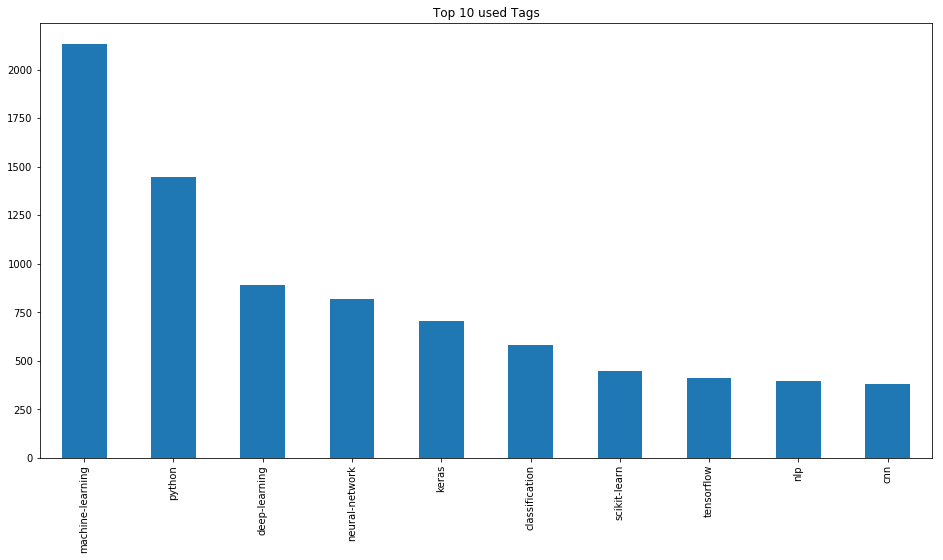

In [13]:
df["Count"].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(16,8),title='Top 10 used Tags')
plt.show()

### Most viewd Tags

In [14]:
dict_views = {}

for i,row in data.iterrows():
    for tag in row["Tags"]:
        if tag in dict_views:
            dict_views[tag] += row["Viewcount"]
        else:
            dict_views[tag] = row["Viewcount"]
            

In [15]:
df2 = pd.DataFrame.from_dict(dict_views,orient='index')
df2.rename(columns={0: "ViewCount"}, inplace=True)
df2["ViewCount"].sort_values(ascending=False).head(10)

python              1803431
machine-learning    1170539
pandas               829503
keras                780769
deep-learning        670009
neural-network       573712
scikit-learn         431842
tensorflow           391212
classification       329088
dataframe            311686
Name: ViewCount, dtype: int64

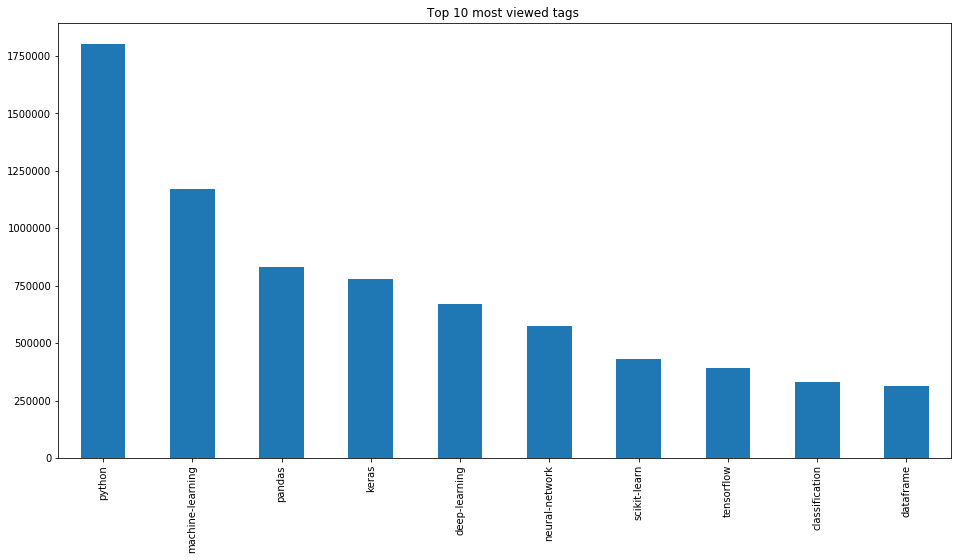

In [16]:
df2["ViewCount"].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(16,8),title="Top 10 most viewed tags ")
plt.show()

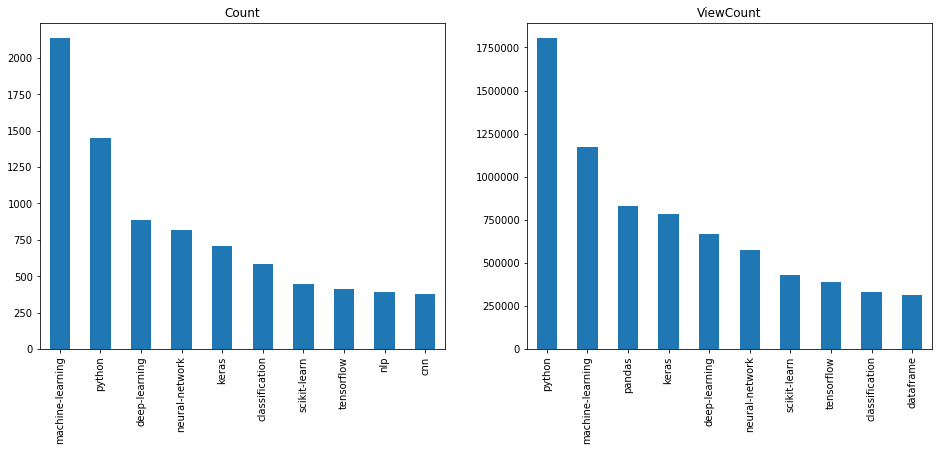

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((16, 6))
df["Count"].sort_values(ascending=False).head(10).plot(kind='bar',ax = axes[0], subplots = True)
df2["ViewCount"].sort_values(ascending=False).head(10).plot(kind='bar',ax = axes[1],subplots = True)

plt.show()




In [18]:
# getting as dataframes, the top 20 most-used / most-viewed Tags
most_used = df.sort_values("Count",ascending=False).head(20)
most_viewed = df2.sort_values("ViewCount",ascending=False).head(20)

In [19]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_used

,Count,ViewCount
machine-learning,2134,1170539.0
python,1448,1803431.0
deep-learning,889,670009.0
neural-network,819,573712.0
keras,706,780769.0
classification,580,329088.0
scikit-learn,447,431842.0
tensorflow,413,391212.0
nlp,394,238505.0
cnn,379,247763.0


From the above summary, the tags : clustering, predictive-modeling, r, feature-selection, data-mining are in the most-used but not in the most viewed.

In [20]:
in_viewed=pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
in_viewed

,Count,ViewCount
python,1448.0,1803431
machine-learning,2134.0,1170539
pandas,315.0,829503
keras,706.0,780769
deep-learning,889.0,670009
neural-network,819.0,573712
scikit-learn,447.0,431842
tensorflow,413.0,391212
classification,580.0,329088
dataframe,NaN,311686


On the other side, the tags : dataframe,numpy,pytorch,csv,xboost are in most-viewed but not in most-count tags.

## Relations between tags

To begin we are going to restrain this analysis to **find a relation between tags-pairs** and to to do so, we will count the number of times each pair is associated in a post by creating a dataframe like in the example below: 

| 0    	| tag1 	| tag2 	| tag3 	|
|------	|------	|------	|------	|
| tag1 	| 98    | 6    	| 12   	|
| tag2 	| 6    	| 4   	| 57   	|
| tag3 	| 12   	| 57   	| 492   |




In [22]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations = associations.fillna(0) #to fill the array with O for each pair.

for tags in data["Tags"]:
    associations.loc[tags, tags]+=1


Note that in total there are 492 tags, so will have a 493 x 493 array which will not be very readable for a human, so will display our array only for the 20 most-used tags to see if there are any relations ships betweens those particular ones.


In [23]:
most_used_relations = associations.loc[most_used.index,most_used.index]
most_used_relations

,machine-learning,python,deep-learning,neural-network,keras,classification,scikit-learn,tensorflow,nlp,cnn,time-series,pandas,lstm,regression,dataset,clustering,predictive-modeling,r,feature-selection,data-mining
machine-learning,2134,404,325,289,146,223,160,69,93,95,106,57,43,100,78,52,100,48,81,85
python,404,1448,106,107,205,84,198,121,64,46,77,218,43,51,41,41,30,19,23,22
deep-learning,325,106,889,244,197,50,12,103,57,120,30,1,71,19,21,2,23,4,18,20
neural-network,289,107,244,819,191,54,20,79,19,95,25,1,49,40,17,4,8,6,7,4
keras,146,205,197,191,706,48,26,196,18,92,34,2,97,25,8,0,9,8,1,1
classification,223,84,50,54,48,580,41,17,31,14,19,3,13,29,21,10,24,8,17,18
scikit-learn,160,198,12,20,26,41,447,8,10,0,7,31,1,33,6,22,11,1,19,2
tensorflow,69,121,103,79,196,17,8,413,7,41,7,2,26,6,7,0,3,1,0,0
nlp,93,64,57,19,18,31,10,7,394,7,0,3,16,2,10,9,0,2,4,6
cnn,95,46,120,95,92,14,0,41,7,379,7,1,18,4,8,0,5,1,1,2


As it is very difficult for a human to draw any conclusions from the above array (even though it is just 20X20), we are goint to plot a heatmap based on the latter. The intensity of the color will will stand for how many times the pair was associated in a post. 

In [24]:
for i in range(most_used_relations.shape[0]):
    most_used_relations.iloc[i,i] = pd.np.NaN

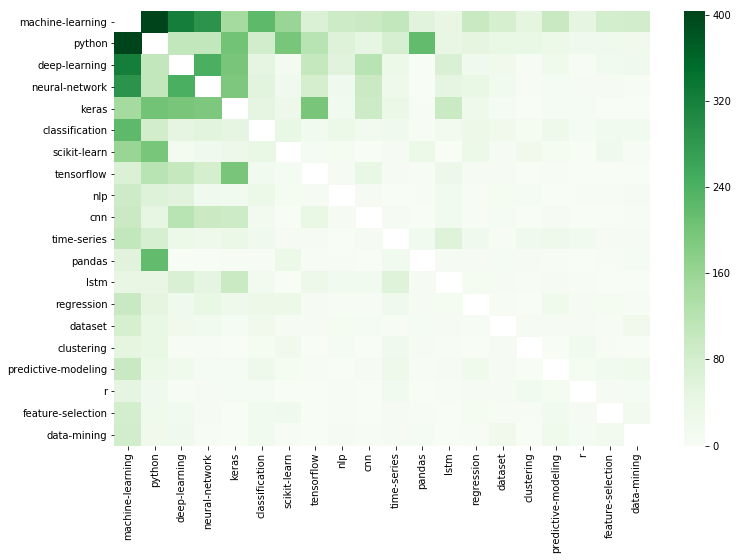

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(most_used_relations, cmap="Greens", annot=False)
plt.show()

The interpretation here comes from the solution solution by a data-quest user on their [Github](https://github.com/dataquestio/solutions/blob/master/Mission469Solutions.ipynb) :
> " The most used tags also seem to have the strongest relationships, as given by the dark concentration in the top left corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

>** A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.**

>Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

>So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk — you'll learn more about statistical independence) in the next step).
We won't get into the details of it, as the technique is out of scope for this course, but it is a path worth investigating! "


## Enter Domain Knowledge

From the top 20 most-used and most-viewed tags dataframe, it turns out that there are tags in common such as :  
`python, machine-learning, deep-learning, neural-network, keras, tensorflow, classification, scikit-learn`

The lowest common denominator for all these terms would be ***machine-learning / deep-learning*** as for instance:
- classification is a unsupervised machine learning technique than can be used in deep-learning
- deep-learning and neural-network are sub-domains of Machine-Learning
- python is a programmin language very popular in Data-Science and all the more so it is used to implement machine-learning algorithms
- keras,tensorflow, scikit-learn are python librairies used machine-learning and deep-learning.

## Deep-Learning : just a fad ?

With the query below we will fetches all the questions asked on DSSE, their dates and their tags. We will store the result of the query in a csv file called : `all_questions.csv` .
We will try to measure the interest for **deep-learning** across time by : 
- Counting how many deep learning questions are asked per time period.
- Computing the total amount of questions per time period.
- How many deep learning questions there are relative to the total amount of questions per time period.

`SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1:`

In [26]:
all_ques = pd.read_csv('all_questions.csv',parse_dates=["CreationDate"])
#all_ques['CreationDate'] = pd.to_datetime(all_ques['CreationDate'])
print(all_ques.shape)




(50000, 3)


In [27]:
all_ques['Tags'] = all_ques['Tags'].str.replace('<','').str.replace('>',',').astype(str)
all_ques['Tags'] = all_ques['Tags'].apply(lambda s: s[:-1])
all_ques["Tags"] = all_ques["Tags"].str.split(",")
all_ques["Tags"].head(10)

0    [c#, android, xamarin.android, async-await, task]
1                       [python, json, django, sqlite]
2                                [tensorflow, upgrade]
3                             [powershell, batch-file]
4                              [unit-testing, methods]
5                                               [sumo]
6                                 [javascript, vue.js]
7         [api, iframe, shopify, steam, steam-web-api]
8                                  [javascript, regex]
9                                    [sql, sql-server]
Name: Tags, dtype: object

### Classifying the deep-learning questions 

To classify the questions as deep-learning-related questions we will definy first a list of terms that we estimated to be associated to **Deep Learning** and then for each post, we will look its tags and if one of them is in the previously defined list, then we will mark this question as a deep-learning questions.

In [28]:
# defining the list of deep-learning related words
deep_l = ['deep-learning','keras','neural_network','tensorflow','cnn','rnn','pytorch']

def deep_learning_cat(L):
    for e in L:
        if e in deep_l:
            return 1
        else:
            return 0
        
all_ques['deep_learning'] = all_ques['Tags'].apply(deep_learning_cat)

